In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import itertools
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df=pd.read_csv(r"C:\Users\pc\Desktop\data\SalesKaggle.csv")

In [3]:
df.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,1.989170e+05,75996.000000,75996.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
mean,106483.543242,8.613626e+05,0.171009,0.322306,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,8.699794e+05,0.376519,1.168615,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,2.172520e+05,0.000000,0.000000,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,6.122080e+05,0.000000,0.000000,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,9.047510e+05,0.000000,0.000000,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000
max,208027.000000,3.960788e+06,1.000000,73.000000,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000


In [4]:
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
Order               198917 non-null int64
File_Type           198917 non-null object
SKU_number          198917 non-null int64
SoldFlag            75996 non-null float64
SoldCount           75996 non-null float64
MarketingType       198917 non-null object
ReleaseNumber       198917 non-null int64
New_Release_Flag    198917 non-null int64
StrengthFactor      198917 non-null float64
PriceReg            198917 non-null float64
ReleaseYear         198917 non-null int64
ItemCount           198917 non-null int64
LowUserPrice        198917 non-null float64
LowNetPrice         198917 non-null float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [6]:
df.shape

(198917, 14)

In [7]:
df.max()

Order                    208027
File_Type            Historical
SKU_number              3960788
SoldFlag                      1
SoldCount                    73
MarketingType                 S
ReleaseNumber                99
New_Release_Flag              1
StrengthFactor      1.73845e+07
PriceReg                12671.5
ReleaseYear                2018
ItemCount                  2542
LowUserPrice            14140.2
LowNetPrice             19138.8
dtype: object

In [8]:
df.min()

Order                    2
File_Type           Active
SKU_number           50001
SoldFlag                 0
SoldCount                0
MarketingType            D
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor       6.275
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: object

In [ ]:
df.mean()

In [10]:
df.corr()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
Order,1.000000,0.042315,-0.173916,-0.120138,-0.051046,-0.047702,-0.148539,-0.050550,0.037010,0.025081,-0.292686,-0.022892
SKU_number,0.042315,1.000000,-0.108202,-0.072361,-0.210245,-0.296522,0.178424,-0.144848,-0.117989,-0.259904,-0.058901,0.035728
SoldFlag,-0.173916,-0.108202,1.000000,0.607248,0.075940,0.006877,-0.144816,0.084213,0.071994,0.236860,0.058525,-0.013734
SoldCount,-0.120138,-0.072361,0.607248,1.000000,0.055435,-0.005201,-0.109237,0.056702,0.070090,0.224002,0.042608,-0.011965
ReleaseNumber,-0.051046,-0.210245,0.075940,0.055435,1.000000,0.561506,-0.066511,0.167343,0.115710,0.164814,0.086223,0.017594
New_Release_Flag,-0.047702,-0.296522,0.006877,-0.005201,0.561506,1.000000,-0.023783,0.161047,0.068657,0.147317,0.084557,0.016698
StrengthFactor,-0.148539,0.178424,-0.144816,-0.109237,-0.066511,-0.023783,1.000000,0.033239,-0.275417,-0.249535,0.022484,0.055824
PriceReg,-0.050550,-0.144848,0.084213,0.056702,0.167343,0.161047,0.033239,1.000000,-0.010082,0.067112,0.135210,0.117767
ReleaseYear,0.037010,-0.117989,0.071994,0.070090,0.115710,0.068657,-0.275417,-0.010082,1.000000,0.033456,0.022759,-0.018850
ItemCount,0.025081,-0.259904,0.236860,0.224002,0.164814,0.147317,-0.249535,0.067112,0.033456,1.000000,0.002236,-0.071282


In [11]:
df.median()

Order               108569.00
SKU_number          612208.00
SoldFlag                 0.00
SoldCount                0.00
ReleaseNumber            2.00
New_Release_Flag         1.00
StrengthFactor      582224.00
PriceReg                69.95
ReleaseYear           2007.00
ItemCount               32.00
LowUserPrice            16.08
LowNetPrice             33.98
dtype: float64

In [12]:
df.std()

Order               6.013672e+04
SKU_number          8.699794e+05
SoldFlag            3.765193e-01
SoldCount           1.168615e+00
ReleaseNumber       3.864243e+00
New_Release_Flag    4.793399e-01
StrengthFactor      1.522090e+06
PriceReg            8.673637e+01
ReleaseYear         9.158331e+00
ItemCount           3.754121e+01
LowUserPrice        6.906616e+01
LowNetPrice         1.285132e+02
dtype: float64

In [13]:
df.apply(pd.Series.value_counts).head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0.00,NaN,NaN,NaN,63000.0,63000.0,NaN,35227.0,71163.0,NaN,2549.0,1.0,288.0,9477.0,6724.0
0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,NaN
0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


selecting

In [14]:
df.describe(include='all')

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,198917,1.989170e+05,75996.000000,75996.000000,198917,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
unique,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Active,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,122921,NaN,NaN,NaN,100946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,106483.543242,NaN,8.613626e+05,0.171009,0.322306,NaN,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,NaN,8.699794e+05,0.376519,1.168615,NaN,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,NaN,5.000100e+04,0.000000,0.000000,NaN,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,NaN,2.172520e+05,0.000000,0.000000,NaN,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,NaN,6.122080e+05,0.000000,0.000000,NaN,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,NaN,9.047510e+05,0.000000,0.000000,NaN,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000


In [15]:
print(df.shape)
print('*****************')
print(df.nunique())
print('*****************')
print(df[df['File_Type']=='Historical']['SKU_number'].count())
print(df[df['File_Type']=='Active']['SKU_number'].count())

(198917, 14)
*****************
Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64
*****************
75996
122921


In [16]:
df_hist=df[df['File_Type']=='Historical']['SKU_number']
df_act=df[df['File_Type']=='Active']['SKU_number']


# note:now we will be using the historical dataset for the analysis and the training the model 

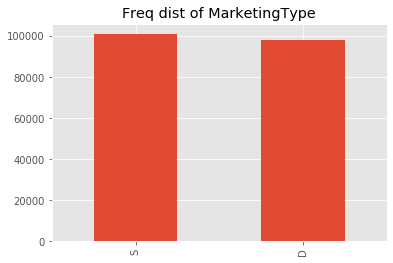

In [17]:
df['MarketingType'].value_counts().plot.bar(title="Freq dist of MarketingType")

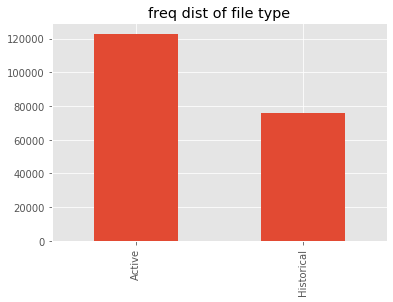

In [18]:
df['File_Type'].value_counts().plot.bar(title='freq dist of file type')

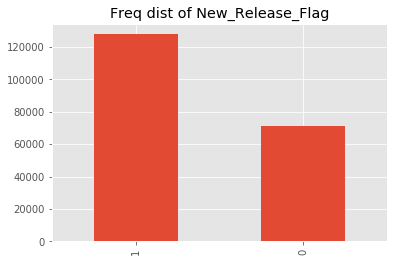

In [19]:
df['New_Release_Flag'].value_counts().plot.bar(title='Freq dist of New_Release_Flag')

In [22]:
df_act['MarketingType'].value_counts().plot.bar(title="Freq dist of MarketingFile Type - active states")

KeyError: 'MarketingType'

KeyError: 'StrengthFactor'

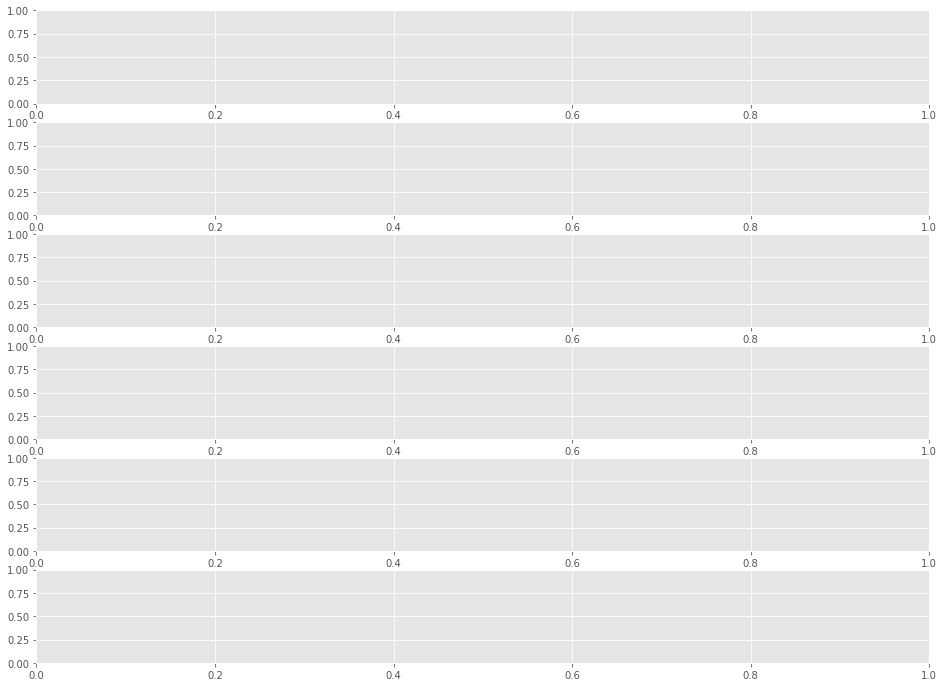

In [25]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):
        
    sns.distplot(df_hist[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.show()